In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [2]:
# Read CSV containing cities weather data 1
city = ".//Resources//cities.csv"
city_df = pd.read_csv(city)
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95


In [3]:
#city_df.dtypes # Date is an int64, how to convert to a date ??
city_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [4]:
#city_df.dtypes # Date is an int64, how to convert to a date ??
city_df['new_date'] = pd.to_datetime(city_df['Date'], unit = 's')
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,new_date
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93,2018-06-13 15:00:00
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64,2018-06-13 15:55:04
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11,2018-06-13 15:51:18
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94,2018-06-13 15:55:05
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95,2018-06-13 15:55:06


In [5]:
city_df.dtypes

City_ID                int64
City                  object
Cloudiness             int64
Country               object
Date                   int64
Humidity               int64
Lat                  float64
Lng                  float64
Max Temp             float64
Wind Speed           float64
new_date      datetime64[ns]
dtype: object

In [6]:
#ensure date column is easy to filter for
city_df['new_date2'] = city_df['new_date'].dt.strftime('%Y%m%d')
print(city_df)

     City_ID          City  Cloudiness Country        Date  Humidity    Lat  \
0          0  jacareacanga           0      BR  1528902000        62  -6.22   
1          1    kaitangata         100      NZ  1528905304        94 -46.28   
2          2      goulburn          20      AU  1528905078        91 -34.75   
3          3          lata          76      IN  1528905305        89  30.78   
4          4    chokurdakh           0      RU  1528905306        88  70.62   
..       ...           ...         ...     ...         ...       ...    ...   
542      542        scalea          36      IT  1528905631       100  39.82   
543      543    san andres          68      PH  1528905632       100  13.32   
544      544        muisne          92      EC  1528905633        84   0.61   
545      545           ati          20      TD  1528905633        25  13.21   
546      546      san luis           0      AR  1528905472        53 -33.30   

        Lng  Max Temp  Wind Speed            new_da

In [7]:
#clean up unwanted date columns
df2=city_df[['City_ID','City','Cloudiness','Country','Humidity','Lat','Lng','Max Temp','Wind Speed','new_date2']]
print(df2)

     City_ID          City  Cloudiness Country  Humidity    Lat     Lng  \
0          0  jacareacanga           0      BR        62  -6.22  -57.76   
1          1    kaitangata         100      NZ        94 -46.28  169.85   
2          2      goulburn          20      AU        91 -34.75  149.72   
3          3          lata          76      IN        89  30.78   78.62   
4          4    chokurdakh           0      RU        88  70.62  147.90   
..       ...           ...         ...     ...       ...    ...     ...   
542      542        scalea          36      IT       100  39.82   15.79   
543      543    san andres          68      PH       100  13.32  122.68   
544      544        muisne          92      EC        84   0.61  -80.02   
545      545           ati          20      TD        25  13.21   18.34   
546      546      san luis           0      AR        53 -33.30  -66.34   

     Max Temp  Wind Speed new_date2  
0       89.60        6.93  20180613  
1       42.61        5.

In [8]:
# rearrange columns and rename for fun
df2 = df2[['City_ID','City','Country','Lat','Lng','new_date2','Cloudiness','Humidity','Max Temp','Wind Speed']]
df2 = df2.rename(columns={'Lng': 'Lon','new_date2': 'Date', 'Cloudiness': 'Clouds (%)', 
                       'Humidity':'Humidity (%)', 'Max Temp': 'Max Temp (F)', 'Wind Speed': 'Wind Speed (mph)'})
df2

,City_ID,City,Country,Lat,Lon,Date,Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,0,jacareacanga,BR,-6.22,-57.76,20180613,0,62,89.60,6.93
1,1,kaitangata,NZ,-46.28,169.85,20180613,100,94,42.61,5.64
2,2,goulburn,AU,-34.75,149.72,20180613,20,91,44.32,10.11
3,3,lata,IN,30.78,78.62,20180613,76,89,59.89,0.94
4,4,chokurdakh,RU,70.62,147.90,20180613,0,88,32.17,2.95
...,...,...,...,...,...,...,...,...,...,...
542,542,scalea,IT,39.82,15.79,20180613,36,100,70.06,5.30
543,543,san andres,PH,13.32,122.68,20180613,68,100,83.47,22.64
544,544,muisne,EC,0.61,-80.02,20180613,92,84,76.90,4.63
545,545,ati,TD,13.21,18.34,20180613,20,25,104.53,4.97


In [9]:
#export dataframea to html file
df2.to_html('.//visualizations/data.html', index=False)


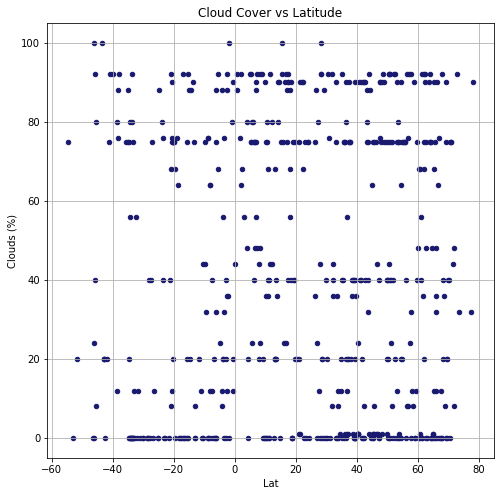

In [28]:
df2.plot(kind="scatter", x="Lat", y="Clouds (%)", grid=True, figsize=(8,8), c='midnightblue',
              title="Cloud Cover vs Latitude")
plt.savefig(".//assets//images//LatVsClouds.png")
plt.show()


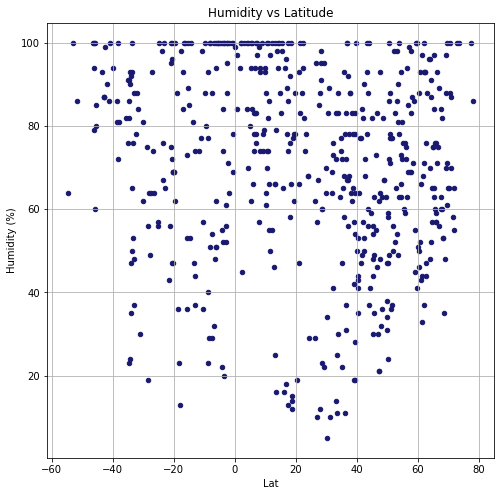

In [25]:
df2.plot(kind="scatter", x="Lat", y="Humidity (%)", grid=True, figsize=(8,8), c='midnightblue',
              title="Humidity vs Latitude")
plt.savefig(".//assets//images//LatsVsHumidity.png")
plt.show()

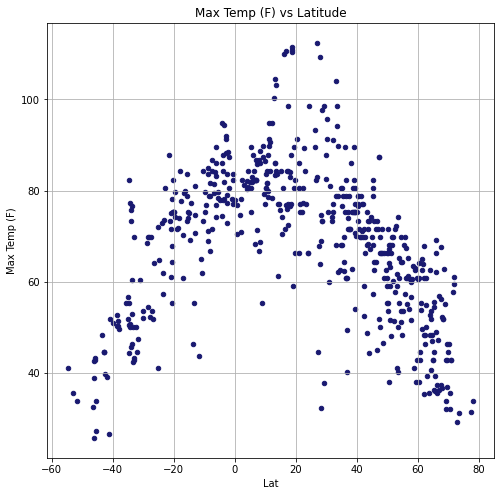

In [31]:
df2.plot(kind="scatter", x="Lat", y="Max Temp (F)", grid=True, figsize=(8,8), c='midnightblue',
              title="Max Temp (F) vs Latitude")
plt.savefig(".//assets//images//LatsVsMaxTemp.png")
plt.show()

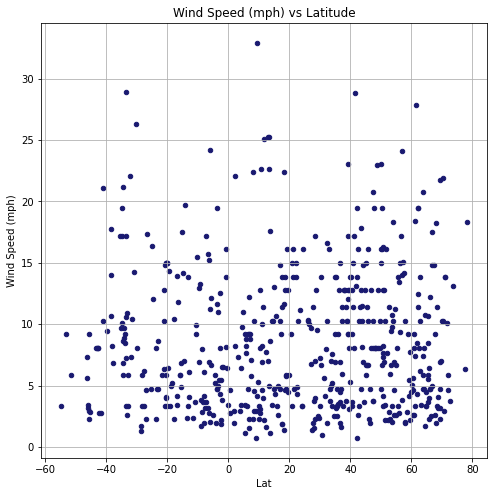

In [23]:
df2.plot(kind="scatter", x="Lat", y="Wind Speed (mph)", grid=True, figsize=(8,8), c='midnightblue',
              title="Wind Speed (mph) vs Latitude")
plt.savefig(".//assets//images//LatsVsWindSpeed.png")
plt.show()